In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r'C:\Users\Dan\Downloads\Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X=data.iloc[:,[3,4]].values

In [5]:
X.shape

(200, 2)

In [8]:
from sklearn.cluster import DBSCAN

In [10]:
epsilon=5.8
dbscan= DBSCAN(eps=4,min_samples=4,metric='euclidean')
dbscan.fit(X)

DBSCAN(eps=4, min_samples=4)

In [11]:
dbscan.labels_

array([-1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2, -1, -1,  3, -1, -1,  4,  3,  4,  3, -1,  3,  4,  5,
        4,  3,  4,  3,  4, -1, -1,  5,  4, -1, -1,  3,  6,  5,  6,  5,  6,
        3,  6,  5, -1,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        7, -1,  7, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [12]:
#mPoints
mpints=4

In [13]:
#epsilon
from sklearn.neighbors import NearestNeighbors
neighbors=NearestNeighbors(n_neighbors=mpints-1)

In [14]:
neighborsfit=neighbors.fit(X)

In [15]:
distance,_=neighborsfit.kneighbors(X)

In [16]:
distance.shape

(200, 3)

In [17]:
distance=np.mean(distance, axis=1)

In [18]:
distance

array([ 3.14905684,  3.16942348,  2.08088023,  1.80473785,  2.87973074,
        1.52549707,  1.72075922,  3.83404792,  2.46830612,  3.19038516,
        0.94280904,  3.07404171,  1.13807119,  1.72075922,  1.13807119,
        2.08088023,  3.10818511,  4.64677614,  3.97123814,  3.50874329,
        2.66666667,  2.0330065 ,  3.80785828,  2.        ,  3.90273464,
        3.39934634,  2.13807119,  6.53410842,  2.57958963,  3.83404792,
        2.69967317,  3.        ,  3.68741925,  3.80104141,  2.72075922,
        4.10337402,  3.29016053,  2.53518376,  3.96127075,  3.60555128,
        2.82842712,  5.09854338,  2.49899203,  2.38742589,  3.29983165,
        3.27698396,  2.25594298,  2.57621897,  1.05409255,  1.05409255,
        1.68816503,  1.38742589,  1.79944855,  1.70770188,  1.52549707,
        2.10818511,  1.68816503,  1.13807119,  1.13807119,  1.41202266,
        1.38742589,  1.33333333,  0.94280904,  0.66666667,  0.80473785,
        0.33333333,  1.        ,  1.        ,  0.33333333,  1.07

In [19]:
distance=sorted(distance)

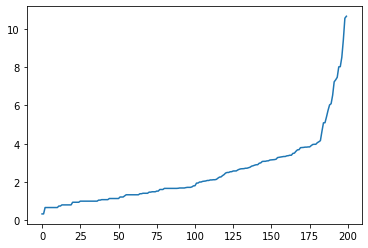

In [20]:
plt.plot(distance)

In [21]:
labels=dbscan.labels_



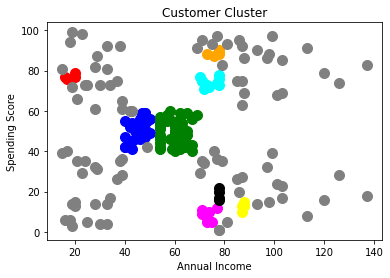

In [23]:
plt.scatter(X[labels==0,0],X[labels==0,1],s=100, c='red',label='cluster1')
plt.scatter(X[labels==1,0],X[labels==1,1],s=100, c='blue',label='cluster2')
plt.scatter(X[labels==2,0],X[labels==2,1],s=100, c='green',label='cluster3')
plt.scatter(X[labels==3,0],X[labels==3,1],s=100, c='cyan',label='cluster4')
plt.scatter(X[labels==4,0],X[labels==4,1],s=100, c='magenta',label='cluster5')
plt.scatter(X[labels==5,0],X[labels==5,1],s=100, c='orange',label='cluster6')
plt.scatter(X[labels==6,0],X[labels==6,1],s=100, c='black',label='cluster7')
plt.scatter(X[labels==7,0],X[labels==7,1],s=100, c='yellow',label='cluster8')
plt.scatter(X[labels==8,0],X[labels==8,1],s=100, c='yellow',label='cluster8')


plt.scatter(X[labels==-1,0],X[labels==-1,1],s=100, c='gray', label='outliers')

plt.title('Customer Cluster')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, labels))

-0.014307829164286037
